# Data Analysis and Reporting with Structured Querying Language (SQL)

## Learning objectives 

- Construct SQL queries to combine data from multiple tables
- Use SQL Window Functions for enhanced reporting

**What we cover:**

**Part 1 - Combining multiple tables**
- Setting up the database connection
- Shop database table structure (schema)
- Subqueries
    - Subquery example
- SQL JOINs
- SQL JOIN example
    - LEFT JOIN
    - INNER JOIN
    - RIGHT JOIN
    - FULL JOIN
- General SQL query structure


**Part 2 - Introduction to SQL Window Functions**
- Setting up the database connection
- Sales database table structure (schema)
- SQL Window Function
- The OVER() keyword
- OVER() keyword structure
- Aggregate function vs. Window function
- Window function use cases
- Defining Window Frame With ROWS

# Part 1 - Combining multiple tables

One of the big advantages of the SQL model is its "relational" design: it makes it very easy to relate tables to one another, to join them up together and to gather columns and rows from different tables. 

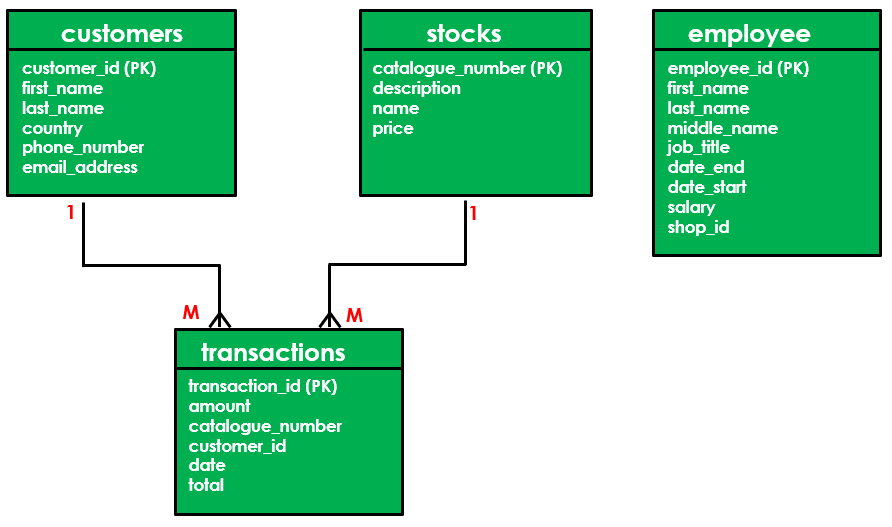

## ☑️ Setting up the database connection

First, import pandas and sqlite3 libraries and create the connection to the `shop_db.db` database, located in the `data` folder:

In [ ]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('data/shop_db.db')

## ☑️ Shop database table structure (schema)

In [ ]:
# querying the sqlite_master table

query = """
SELECT name 
FROM sqlite_master 
WHERE type = 'table';
"""

df = pd.read_sql_query(query, conn)
df

In [ ]:
# schema for each table

for table in ['customers', 'stocks', 'transactions', 'employees']:
    
    query = f"""
    SELECT sql 
    FROM sqlite_master 
    WHERE name = '{table}';
    """
    
    df = pd.read_sql_query(query, conn)
    print(''.join(df.values[0, 0]))

## ☑️ Subqueries

- A subquery in SQL is a query that is nested inside another query.

- The inner query (subquery) is executed first, and the results of the inner query are used by the outer query to perform further operations.

- Subqueries can be used in various parts of a SQL statement, such as SELECT, FROM, WHERE, and HAVING keywords.

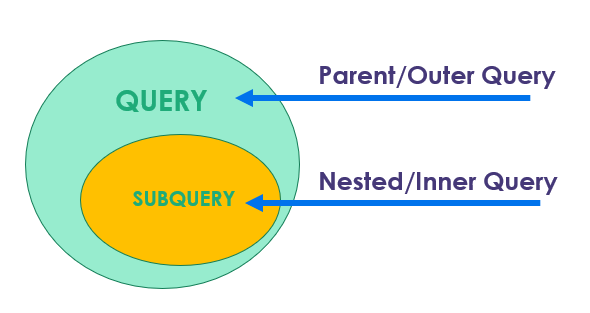

Here's all of our transactions data. 

In [ ]:
query = """
SELECT *
FROM transactions;
"""

df = pd.read_sql_query(query, conn)
df

Let’s find all customer transactions having a total amount greater than £20

In [ ]:
query = """
SELECT customer_id
FROM transactions
WHERE total > 20;
"""

df = pd.read_sql_query(query, conn)
df

In the above query, you see the `customer_id` information for customers who spend more than £20, however, you don’t see their first_name, last_name information, in order to reference this information you need to join with the customer table. In the next step let’s explore how to do this using a subquery. 

### Subquery example

Find the `names` of customers who spent more than `£20`:

In [ ]:
query = """
SELECT first_name, last_name
FROM customers
WHERE customer_id IN
(
    SELECT customer_id
    from transactions
    WHERE total > 20
);

"""
df = pd.read_sql_query(query, conn)
df

Let’s explore the above subquery:

Look first at the inner query inside the brackets: this is the subquery. Here we fetch customer_id's from the transactions table where the individual transaction had a total value larger than 20. This returns a table with just one column: customer_id.

In the outer query, we get the first_name, last_name from the customer table WHERE the customer_id is in the table returned by the subquery. 

Hopefully, this feels like quite a logical way to layout this query! 

In the next section we're going to explore a much cleaner way to do this now using SQL JOINs!

## ☑️ SQL JOINs

A join is a method of linking data between two or more tables based on the values of a common column between them. This common column is typically the primary key column of one table and the foreign key column of another table.

Different types of JOINs:
- LEFT JOIN: Select records from the first (left-most) table with matching right table records
- RIGHT JOIN: Select records from the second (right-most) table with matching left table records
- INNER JOIN: Select records that have matching values in both tables
- FULL JOIN: Returns all matching records from both tables whether the other table matches or not

## ☑️ SQL JOIN example

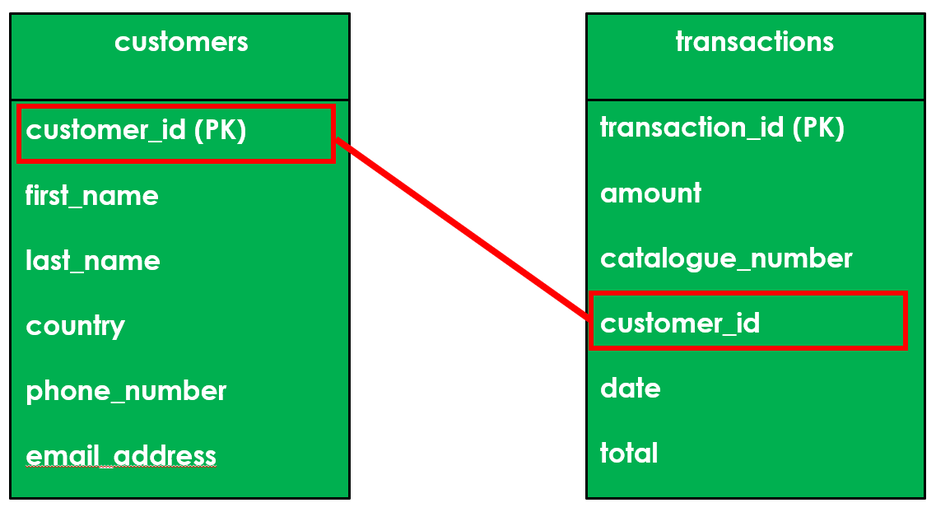


Here's a very typical example of how one table might relate to another. 

- On the left, we have a "customers" table which records information related customers.

- On the right, we have a "transactions" table which records various transactions: each transaction has an associated customer. Instead of keeping all of the information about the customer with the transaction, it's effecient to just keep the customer_id in the transactions table such that the rest of the customer information can be fetched from the customers table when needed.

The way we describe this relation in SQL is called a "JOIN".  The idea behind a "JOIN" is that we combine the rows of the tables using a related column, as in this example: both tables have a column "customer_id", which we can use to relate the rows of the two tables.

## ☑️ LEFT JOIN
- Returns all records from left table with matching records from right table
- Here we are giving *preference* to the left table
- SQLite uses LEFT JOIN keyword

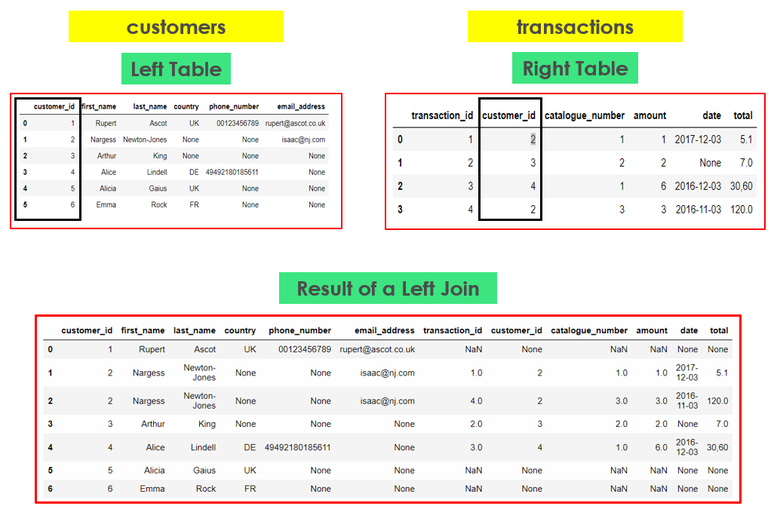

In the above example, the LEFT JOIN returns all customer records from the left table and the matching order transactions from the right table. If no matching rows are found in the right table, NULL(NaN and None) are used.

In [ ]:
#Example_1

query = """
SELECT *
FROM customers
LEFT JOIN transactions 
ON customers.customer_id = transactions.customer_id;
"""

df = pd.read_sql_query(query, conn)
df

In [ ]:
#Example_2

query = """
SELECT first_name, total
FROM customers
LEFT JOIN transactions 
ON customers.customer_id = transactions.customer_id;
"""

df = pd.read_sql_query(query, conn)
df

- Note that we could write `customers.first_name` and `transactions.total`, useful when two tables have conflicting column names.

Let's take a look at a real example of this now. We have a table customers and a table transactions. We do a LEFT JOIN starting from the customers table, joining to the transactions table.

We tell SQL to join the tables on the id using `customers DOT customer_id = transactions DOT customer_id`. The DOT is there to describe which column we want from which table. It's common practice to ALIAS the tables during JOINS to make this more readable - we'll get into this later. See [here](https://www.dofactory.com/sql/alias) for more details

Notice that some rows have NULL(NaN and None) in the total column: this is because we returned the customer even if they didn't have an associated transaction.

## ☑️ INNER JOIN

- Returns records that have matching values in both tables
- SQLite uses INNER JOIN keyword

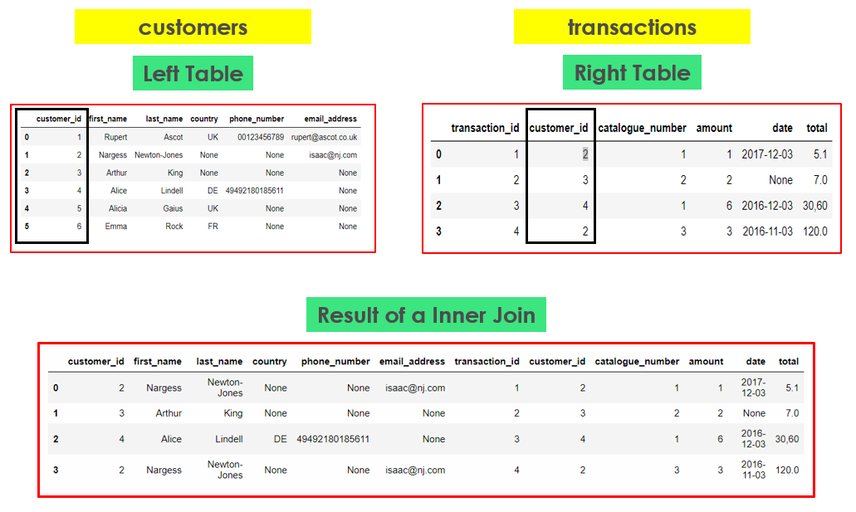

So here's an example query. We take the first_name from the customer table and the total from the transaction table at we join them up by checking the equality of the customer_id in each table. 

In [ ]:
#Example_1

query = """
SELECT *
FROM customers
INNER JOIN transactions 
ON customers.customer_id = transactions.customer_id;
"""

df = pd.read_sql_query(query, conn)
df

In [ ]:
#Example_2

query = """
SELECT first_name, total
FROM customers
INNER JOIN transactions 
ON customers.customer_id = transactions.customer_id;
"""

df = pd.read_sql_query(query, conn)
df

## ☑️ RIGHT JOIN

- Returns all records from right table with matching records from left table
- SQLite uses RIGHT JOIN keyword
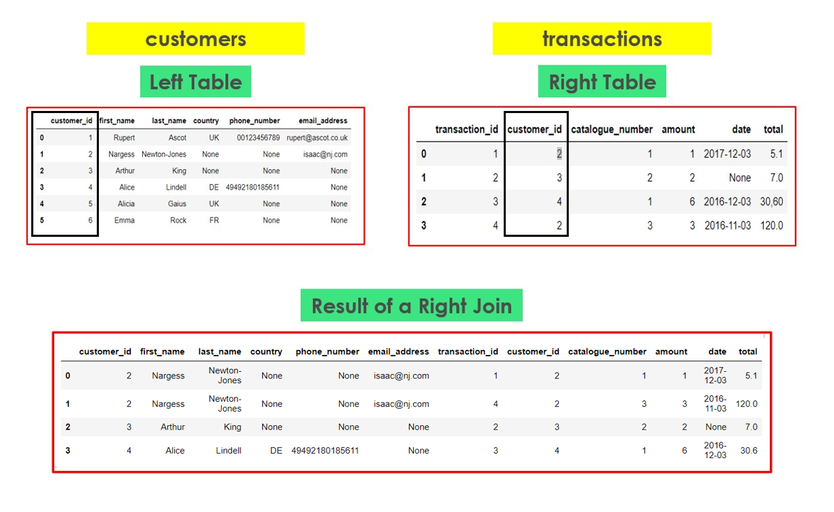

So here's an example query.

In [ ]:
query = """
SELECT *
FROM customers
RIGHT JOIN transactions
ON customers.customer_id = transactions.customer_id;
"""

df = pd.read_sql_query(query, conn)
df

## ☑️ FULL JOIN

- Return all records from both tables while matching the records that have matching values
- SQLite uses FULL JOIN keyword

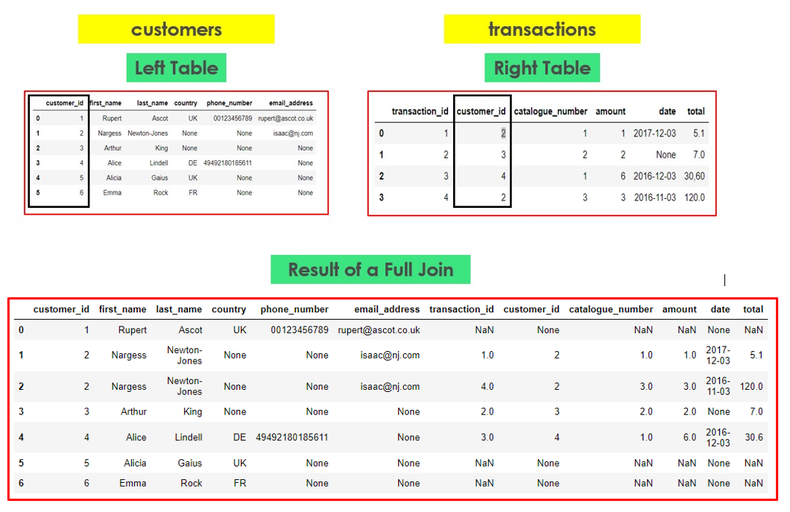

So here's an example query.

In [ ]:
#Example_1

query = """
SELECT *
FROM customers
FULL JOIN transactions
ON customers.customer_id = transactions.customer_id;
"""

df = pd.read_sql_query(query, conn)
df

Also, you can effectively emulate a SQL `FULL JOIN` by combining a `LEFT JOIN` and a `RIGHT JOIN` with the `UNION` operator.

In [ ]:
#Example_2

query = """
SELECT *
FROM customers
LEFT JOIN transactions 
ON customers.customer_id = transactions.customer_id

UNION

SELECT *
FROM customers
RIGHT JOIN transactions 
ON customers.customer_id = transactions.customer_id
WHERE customers.customer_id IS NULL
"""

df = pd.read_sql_query(query, conn)
df

The LEFT JOIN captures all customers and their transactions (with NULL for those without transactions).

The RIGHT JOIN with `WHERE customers.customer_id IS NULL` ensures that you also capture all transactions that don't have a corresponding customer.

The `SQL UNION operator` is used to combine the result sets of two or more SELECT statements into a single result set. It also removes duplicates by default, ensuring each row appears only once in the final result set.

## ☑️ General SQL query structure

```SQL
SELECT <column_list>
FROM <table_name>
 (JOIN <second_table_name>)
WHERE <filter_condition>
GROUP BY <grouping>
HAVING <aggregate_filter_condition>
ORDER BY <column_list> [ASC|DESC]
LIMIT <number_of_rows>;
```
Now that we have JOIN functionality, we can think of the general SQL SELECT query structure as looking like this:

- First, we specify the columns we want. Any column-wise operations like COUNT or DISTINCT go here

- Next, we specify the table that we are SELECTing from, and we follow this with any JOINs if we are selecting from multiple tables

- We then set a WHERE condition if applicable to filter the rows of the table, and we may also choose to use GROUP BY, HAVING, ORDER BY and LIMIT

# Part 2 - Introduction to SQL Window Functions



## ☑️ Setting up the database connection

We will work with `sales_db.db` database, make sure you run the following code cells before you proceed. 

import pandas and sqlite3 libraries and create the connection to the `sales_db.db` database, located in the `data` folder:

In [ ]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("data/sales_db.db")

## ☑️ Sales database table structure (schema)

`sales_db.db` database contains one table `SalesInfo`:

In [ ]:
query = """
SELECT name 
FROM sqlite_master 
WHERE type = 'table';
"""
df = pd.read_sql_query(query, conn)
df

`SalesInfo` table contains `year`, `month` and `amount` columns:

In [ ]:
query = """
SELECT *
FROM SalesInfo;
"""
df = pd.read_sql_query(query, conn)
df

## ☑️ SQL Window Function

- A window function performs an aggregate-like operation on a set of query rows.


- However, whereas an aggregate operation groups query rows into a single result row, a window function produces a result for each query row. A window function does not cause rows to become grouped into a single output row.


- A window function make use of `OVER()` keyword.

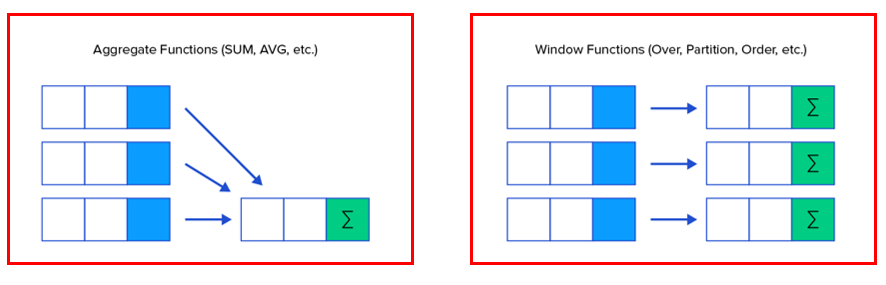

## ☑️ The OVER() keyword

The `OVER()` keyword is used to specify a window or a set of rows that a particular function should be applied to.

The `OVER()` keyword have three arguments: `PARTITION BY`, `ORDER BY`, and `ROWS`.


The window is defined using the `PARTITION BY` and `ROWS` keywords which separates the rows into groups based on the specified column(s). The `ORDER BY` keyword is used to sort the rows.


The `OVER()` keyword can be used with several aggregate functions, including SUM, AVG, COUNT, MAX, MIN and RANK. It is commonly used to calculate running totals, moving averages, and other similar calculations.

## ☑️ OVER() keyword structure

```SQL
<window_function>() OVER (
                    [PARTITION BY <partition_expression>,]
                    [ORDER BY <sort_expression [ASC|DESC]>,]
                    [ROWS BETWEEN <frame_start> AND <frame_end>]
                        )
```
- `window_function`: SUM(), AVG(), RANK(), etc. See [here](https://www.sqltutorial.org/sql-window-functions/) for a full list.
- `expression`: e.g. the target column
- `OVER`
  - PARTITION BY: similar to group by
  - ORDER BY: to sort data (ASC/DESC)
  - ROWS: to specify range of rows

## ☑️ Aggregate function vs. Window function

Here's an example of how the SUM() aggregate function can be used to calculate the total sales from `SalesInfo` table:

In [ ]:
#Aggregate function

query = """
SELECT SUM(amount)
FROM SalesInfo;

"""
df = pd.read_sql_query(query, conn)
df

Here's an example of how the `OVER()` keyword can be used to calculate the total sales from `SalesInfo` table:

In [ ]:
#Window function

query = """
SELECT *,
SUM(amount) OVER()
FROM SalesInfo;

"""
df = pd.read_sql_query(query, conn)
df

## ☑️ Window function use cases

## Examples (I) - Calculate a Running Total

In [ ]:
query = """
SELECT *,
SUM(amount) OVER(ORDER BY year, month) AS running_total
FROM SalesInfo;

"""
df = pd.read_sql_query(query, conn)
df

Let's explore the above example.

Here the window function is `SUM`. First, we `ORDER BY` rows `year` and `month` columns; this means that we'll be taking a running total over each month (and the months will be sorted in ascending order).

Notice that, because we didn't specify a partition, this window function will be applied to every row in the table.

Finally, we name the new column `running_total`. 

The column `running_total` contains one value per month, where the total is a running over each of the ordered months. So row 1 (2022 January) has just the amount for month 1, whereas row 12 (2023 June) has the running total, the sum of the amount of all the months so far plus the amount from 2023 June.

## Examples (II) - Calculate a Running Total on year-on-year basis

In [ ]:
query = """
SELECT *,
SUM(amount) OVER(PARTITION BY year ORDER BY month) AS running_total
FROM SalesInfo;

"""
df = pd.read_sql_query(query, conn)
df

In the above example, the code `SUM(amount) OVER(PARTITION BY year ORDER BY month)` can be used to split the `SUM(amount)` over each `year` and sort according to `month`.

## Examples (III) - Calculate top sales

In [ ]:
query = """
SELECT *,
RANK() OVER(PARTITION BY year ORDER BY amount DESC) AS top_sales
FROM SalesInfo;

"""
df = pd.read_sql_query(query, conn)
df

Let's see another example.

This time the window function we're using is `RANK()`. 

The `RANK()` function assigns a "ranking" to each of the rows in the partition of a window. For example here we partition the data up by `year`. So we get a "ranking" for each month in each partition. The largest sale amount gets the rank 1 and so on.

Notice that the "ranking" restarts for each year because of the "partition by" that we used.

## ☑️ Defining Window Frame with ROWS

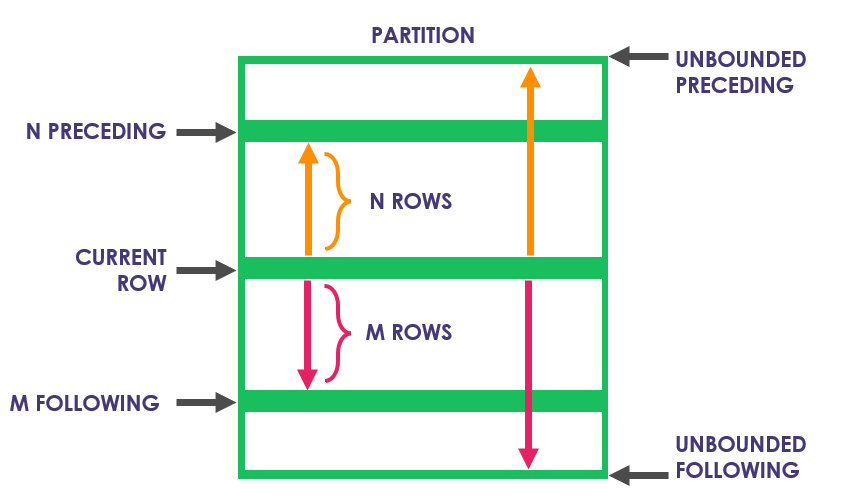

A frame is the subset of the current partition in which the windowing function will work.


A frame is defined by a set of rows that are "in scope" for the calculation. The frame can be specified using one or more of the following keywords:

- `CURRENT ROW` - used with the ROWS BETWEEN keyword to specify that the current row is included in the frame.


- `ROWS BETWEEN` - specifies a range of rows to include in the frame, based on their position relative to the current row.

    - For example, we could specify that we want "N preceding" and "M following" rows. Now the window is around the current row, and the window function (SUM,AVG,RANK etc.) is applied to the frame in the partition.


- `UNBOUNDED PRECEDING` and `UNBOUNDED FOLLOWING` - used with the ROWS BETWEEN keyword to specify that all rows before or after the current row, respectively, are included in the frame.
    - `UNBOUNDED PRECEDING` refers to the First Row
    - `UNBOUNDED FOLLOWING` refers to the Last Row



For more details, see [here](https://www.sqlitetutorial.net/sqlite-window-functions/sqlite-window-frame/)

## Examples (I) - Calculate Moving Average for each year

In [ ]:
query = """
SELECT *, 
AVG(amount) OVER (PARTITION BY year
                  ORDER BY month
                  ROWS BETWEEN 1 PRECEDING AND 1 FOLLOWING) AS SalesMovingAvg
FROM SalesInfo;

"""
df = pd.read_sql_query(query, conn)
df

The `OVER()` keyword with `PARTITION BY` `year` indicates that the window function should be calculated separately for each unique value of the year column. The `ORDER BY` keyword with `month` specifies the order of rows within each partition based on the values in the month column.

The `ROWS BETWEEN 1 PRECEDING AND 1 FOLLOWING` specifies that the window frame for the `AVG()` function should include the current row, as well as the row immediately preceding(i.e. the previous month) and following(i.e. the next month) the current row, in each partition.

This means that the moving average will be calculated over a window of three consecutive rows (i.e. three months) in each partition.

## Examples (II) - Calculate Average for each year

In [ ]:
query = """
SELECT *, 
AVG(amount) OVER (PARTITION BY year 
                  ORDER BY month
                  ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS SalesAverage
FROM SalesInfo;
"""
df = pd.read_sql_query(query, conn)
df

The `OVER()` keyword with `PARTITION BY` `year` indicates that the window function should be calculated separately for each unique value of the year column. The `ORDER BY` keyword with `month` specifies the order of rows within each partition based on the values in the month column.

The `ROWS BETWEEN` `UNBOUNDED PRECEDING` AND `UNBOUNDED FOLLOWING` specifies that the window frame for the `AVG()` function should include all rows in the partition, from the **first row** to the **last row**.

## Examples (III) - Calculate Rolling Average for each year

In [ ]:
query = """
SELECT *, 
AVG(amount) OVER (PARTITION BY year 
                  ORDER BY month
                  ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS RollingAvg
FROM SalesInfo;
"""
df = pd.read_sql_query(query, conn)
df

The `OVER()` keyword with `PARTITION BY` `year` indicates that the window function should be calculated separately for each unique value of the year column. The `ORDER BY` keyword with `month` specifies the order of rows within each partition based on the values in the month column.

The `ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW` specifies that the window frame for the `AVG()` function should include all rows in the partition from the first row to the current row, inclusive. 

This means that the rolling average will be calculated over a window of all rows up to and including the current row in each partition.

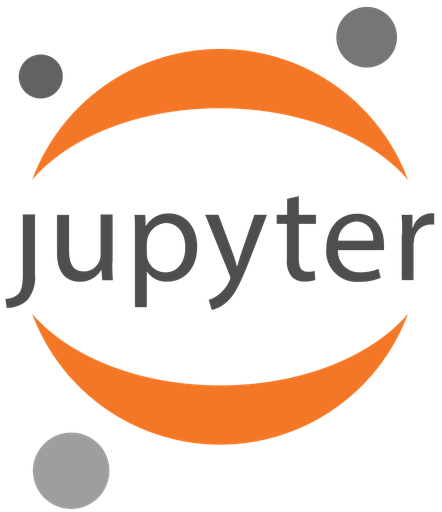

Now open the following workbook: `intermediate-sql-workbook.ipynb`